In [1]:
# To run this notebook you have to install cloc by typing
# sudo apt install cloc
# on linux systems. For windows systems see here: 
# https://github.com/AlDanial/cloc#apt-get
import yaml
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style('whitegrid')

In [2]:
# Call cloc and write result to a yaml file
!cloc --yaml --out=cloc_results.yaml ../../../

     280 text files.
     273 unique files.                                          
     211 files ignored.
Wrote cloc_results.yaml


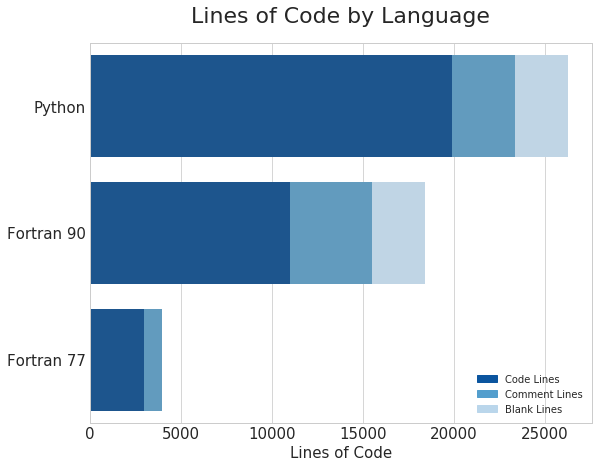

In [3]:
# load results
with open('cloc_results.yaml', 'r') as y:
    results = yaml.load(y)

# store the relevant results in a DataFrame
df = pd.DataFrame.from_dict(results).T
df = df[['code', 'comment', 'blank']]
df = df.loc[['Python', 'Fortran 90', 'Fortran 77']]

# take the cumsum to make a stacked bar graph
df = df.cumsum(axis=1)
df.reset_index(inplace=True)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# get the names of some colors
pal = sns.color_palette('Blues')
b1, b2, b3, b4, b5, b6 = pal.as_hex()

# Plot the bars, order is important!
sns.barplot(x='blank', y='index', data=df, color=b2)
sns.barplot(x='comment', y='index', data=df, color=b4)
sns.barplot(x='code', y='index', data=df, color=b6)

# Style the labels
ax.set_xlabel('Lines of Code', fontsize=15, weight=500)
ax.set_ylabel('')
ax.set_title('Lines of Code by Language', fontsize=22, weight=500, pad=20)
ax.tick_params(labelsize=15)

# make a legend
code_patch = mpatches.Patch(color=b6, label='Code Lines')
comment_patch = mpatches.Patch(color=b4 , label='Comment Lines')
blank_patch = mpatches.Patch(color=b2, label='Blank Lines')
plt.legend(handles=[code_patch, comment_patch, blank_patch])

f.savefig('lines_of_code_by_language.png', bbox_inches='tight', dpi=200)